<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import wget

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [3]:
#boston_df.head()

Text(0, 0.5, 'Median value of homes in $USD thousands')

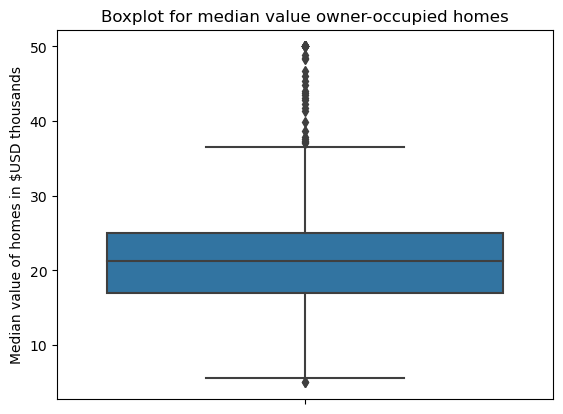

In [4]:
ax = sns.boxplot(y='MEDV', data=boston_df)

pyplot.title('Boxplot for median value owner-occupied homes')
pyplot.ylabel('Median value of homes in $USD thousands')

## Q1. Is there a significant difference in the median value of houses bounded by the Charles river?

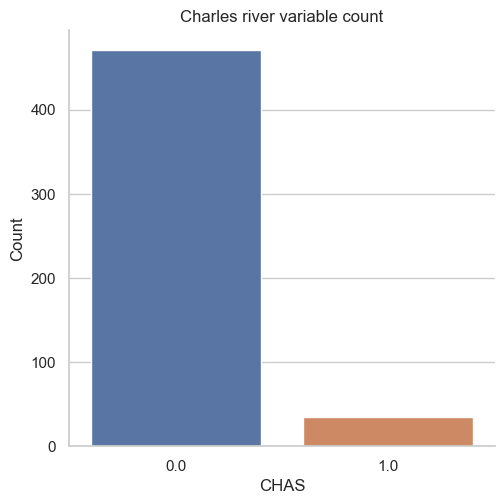

In [5]:
sns.set(style="whitegrid")
ax = sns.catplot(x='CHAS', kind='count', data=boston_df)
pyplot.title('Charles river variable count')
pyplot.ylabel('Count')
pyplot.show()

The graphic tell us that most of the houses are not bounded by the river.

State the hypothesis
* $H_0: µ_1 = µ_2$ ("there is not a significant difference in median value between houses bounded and not bounded by the river")
* $H_1: µ_1 ≠ µ_2$ ("there is a significant difference in median value between houses bounded and not bounded by the river")

In [6]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center="mean")

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value is less than 0.05 we can assume not equality of variance.

In [7]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis that states that 
there is not a significant difference in median value between houses bounded and not bounded by the river

## Q2. Is there any difference in Median values of houses(MEDV) for each proportion of owner occupied units built prior to 1940(AGE)? 

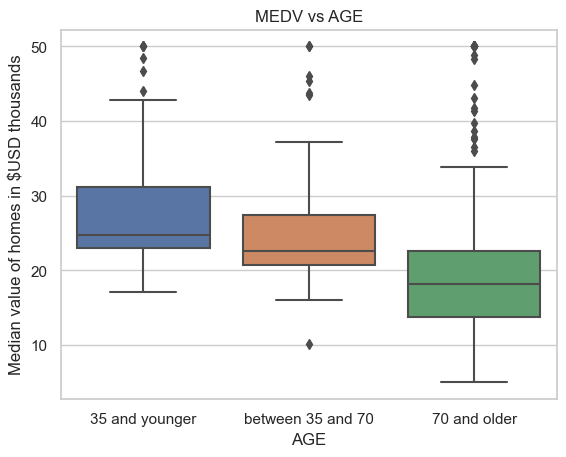

In [8]:
sns.boxplot(x=boston_df['AGE'].apply(lambda age: '35 and younger' if age <= 35 else ('between 35 and 70' if age <= 70 else '70 and older')), y='MEDV', order=['35 and younger','between 35 and 70','70 and older'], data=boston_df)
pyplot.title('MEDV vs AGE')
pyplot.ylabel('Median value of homes in $USD thousands')
pyplot.show()


The graphic tell us that there is a difference between the medians of all the age groups.

State the hypothesis
* $H_0: µ_1 = µ_2:$There is not significant difference in median values of houses for each proportion of owner ocuppied units built prior to 1940
* $H_1:$ There is a significant difference in median values of houses for each proportion of owner ocuppied units built prior to 1940


In [9]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

Test equility of variance

In [10]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')
# since the p-value is grearer than 0.05, the variance are equal

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [11]:
forty_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
forty_fiftyseven = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
fiftyseven_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_fiftyseven, fiftyseven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))


F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

## Q3. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

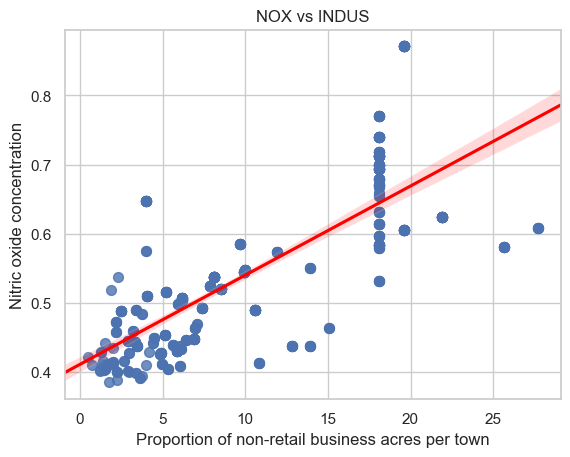

In [12]:
#sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
#Alternative way to create a trend line
sns.regplot(x='INDUS', y='NOX', data=boston_df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
pyplot.title('NOX vs INDUS')
pyplot.xlabel('Proportion of non-retail business acres per town')
pyplot.ylabel('Nitric oxide concentration')
pyplot.show()

The graphic tell us that there is positive relationship between both variables.

State the hypothesis:
* $H_0:$ There is no significant correlation between nitric oxide concentrations and the proportions of non-retail business acres per town
* $H_1:$ There is a significant correlation between nitric oxide concentrations and the proportions of non-retail business acres per town


In [13]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209166, pvalue=7.913361061229671e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there exists a relationship between nitric oxide concentrations and the proportions of non-retail business acres per town.

## Q4. What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner occupied homes?

* $H_0: β1$ = 0 (Distance has no effect on the median value of owner occupied homes)
* $H_1: β1$ is not equal to 0 (Distance has an effect the median value of owner occupied homes)

In [14]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        02:39:32   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation:<br>
-For each increment in the distance to the employment centers, the median value increases by 1.09<br>
-There is a significative relationship between the distance and the median value (p-value<0.05)<br>
-6.2% of the variance of the median home values can be explained by the distance to the employment centers<br>
<br>
Conclusion:<br>
There is a positive relationship between the distance to the boston employment centers and the median value of owner occupied homes.
